In [1]:
import pickle
import numpy as np
from scipy import stats
from scipy import special
from scipy import integrate
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from common import print_metric_names

# Gaussian Mean Difference

In [3]:
result_df = pd.read_csv("../results/result-tables/gaussian-mean-difference.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,dim,syn_mean
0,I-Prec,0,gaussian-mean-difference,0,0.003000,1,-6.00
1,I-Rec,0,gaussian-mean-difference,0,0.005000,1,-6.00
2,Density,0,gaussian-mean-difference,0,0.001400,1,-6.00
3,Coverage,0,gaussian-mean-difference,0,0.002000,1,-6.00
4,I-Prec,0,gaussian-mean-difference,0,0.011000,1,-5.76
...,...,...,...,...,...,...,...
18355,P-Rec,2,gaussian-mean-difference,9,0.133314,64,0.92
18356,P-Prec,2,gaussian-mean-difference,9,0.096292,64,0.96
18357,P-Rec,2,gaussian-mean-difference,9,0.124661,64,0.96
18358,P-Prec,2,gaussian-mean-difference,9,0.067098,64,1.00


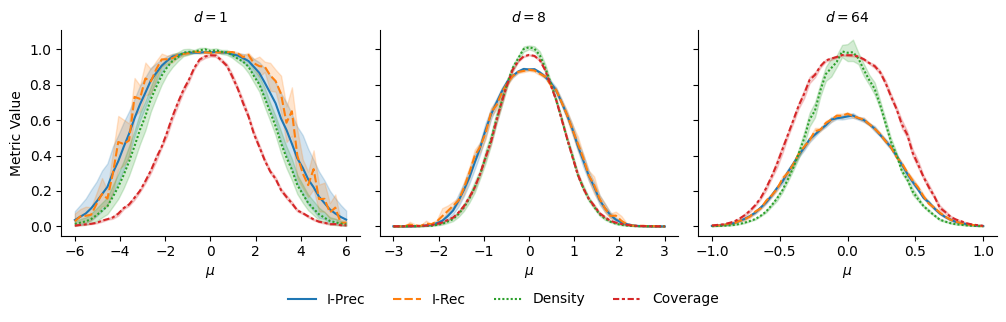

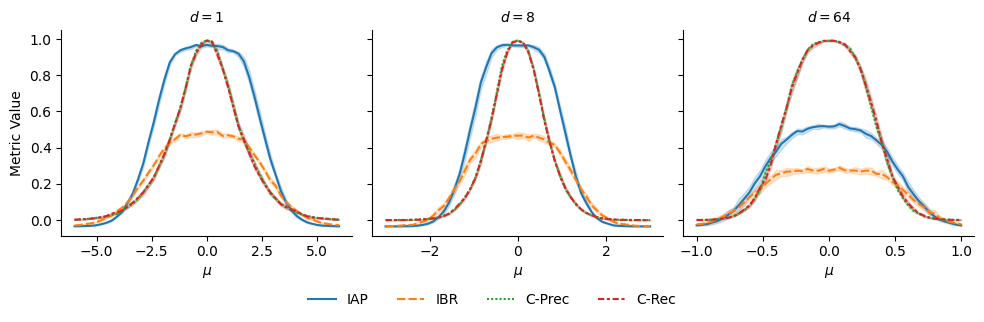

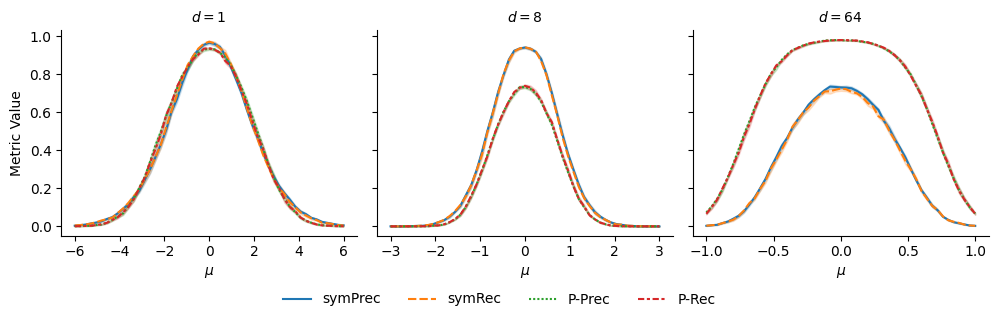

In [4]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    g = sns.FacetGrid(subset_df, col="dim", sharex="col")
    g.map_dataframe(sns.lineplot, x="syn_mean", y="value", hue="Metric", style="Metric")
    g.set_titles("$d = {col_name}$")
    g.set_xlabels("$\mu$")
    g.set_ylabels("Metric Value")
    g.add_legend()
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.05), ncol=4)
    plt.tight_layout()
    plt.savefig("../figures/gaussian/gaussian_mean_difference_{}.pdf".format(i), bbox_inches="tight")
    plt.show()

# Gaussian Mean Difference with Outlier

In [51]:
print_outlier_scenario = {
    "real_outlier": "Outlier in Real",
    "syn_outlier": "Outlier in Synthetic",
}
reverse_print_outlier_scenario = {
    value: key for key, value in print_outlier_scenario.items()
}

In [52]:
result_df = pd.read_csv("../results/result-tables/gaussian-mean-difference-with-outlier.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df.outlier_scenario = result_df.outlier_scenario.map(print_outlier_scenario)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,dim,syn_mean,outlier_scenario
0,I-Prec,0,gaussian-mean-difference-with-outlier,0,0.004000,1,-6.00,Outlier in Real
1,I-Rec,0,gaussian-mean-difference-with-outlier,0,0.406593,1,-6.00,Outlier in Real
2,Density,0,gaussian-mean-difference-with-outlier,0,0.003200,1,-6.00,Outlier in Real
3,Coverage,0,gaussian-mean-difference-with-outlier,0,0.013986,1,-6.00,Outlier in Real
4,I-Prec,0,gaussian-mean-difference-with-outlier,0,0.003996,1,-6.00,Outlier in Synthetic
...,...,...,...,...,...,...,...,...
36715,P-Rec,2,gaussian-mean-difference-with-outlier,9,0.064412,64,0.96,Outlier in Synthetic
36716,P-Prec,2,gaussian-mean-difference-with-outlier,9,0.315139,64,1.00,Outlier in Real
36717,P-Rec,2,gaussian-mean-difference-with-outlier,9,0.056815,64,1.00,Outlier in Real
36718,P-Prec,2,gaussian-mean-difference-with-outlier,9,0.073562,64,1.00,Outlier in Synthetic


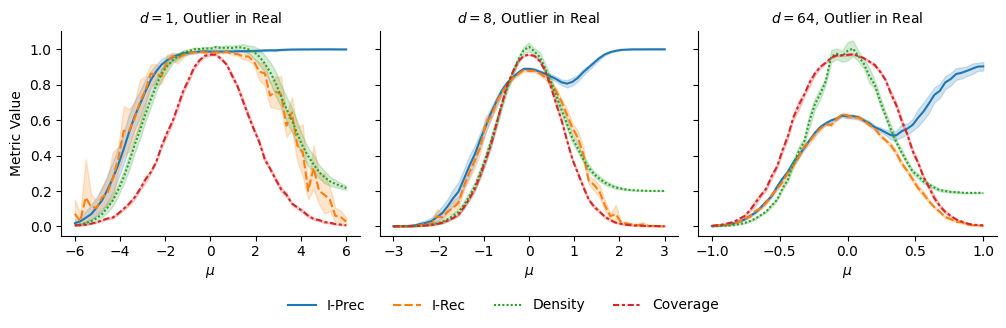

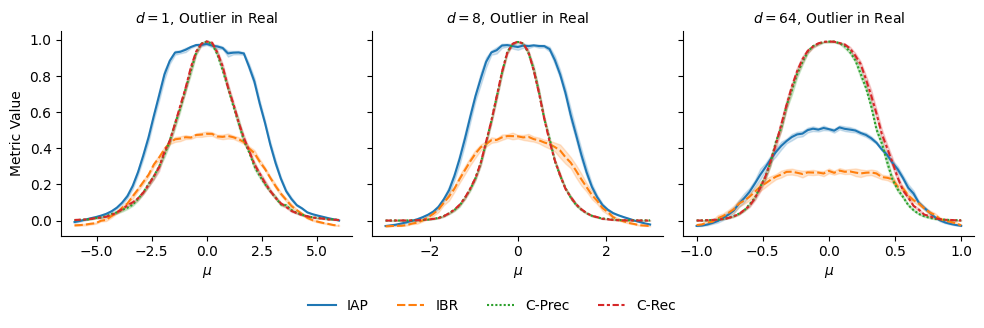

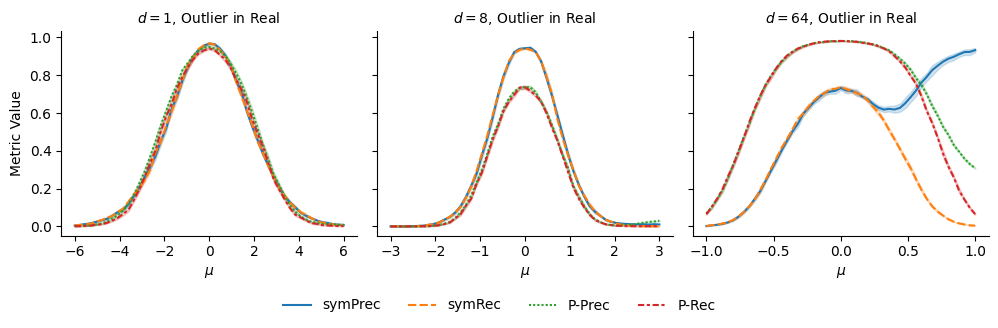

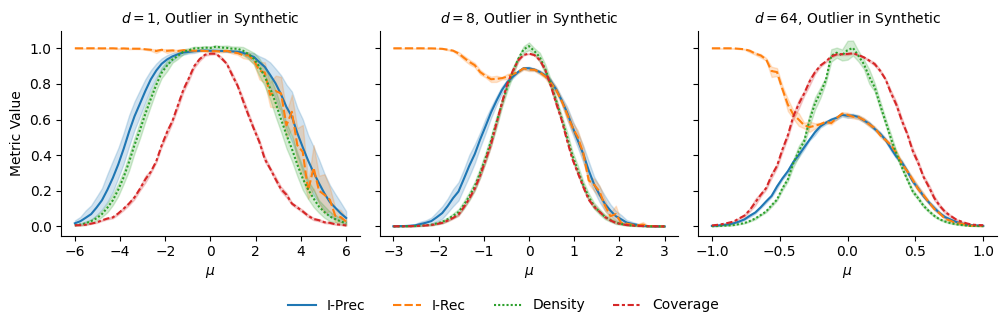

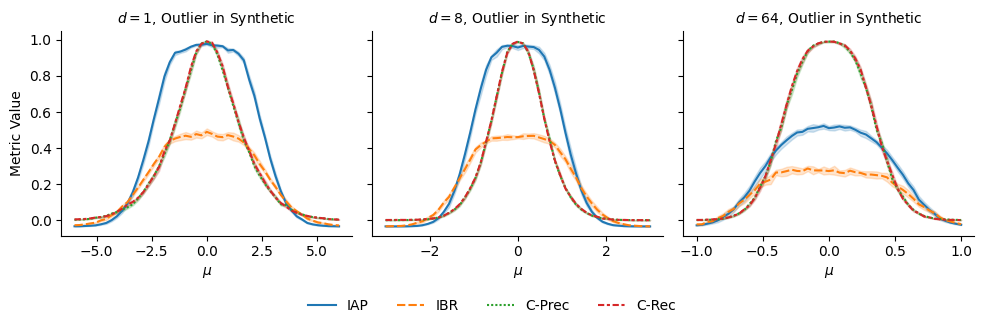

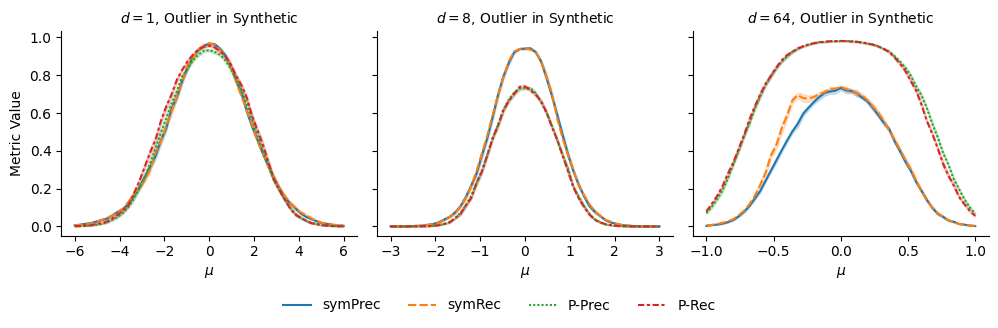

In [53]:
for outlier_scenario in print_outlier_scenario.values():
    for i in range(3):
        subset_df = result_df[(result_df.metric_group == i) & (result_df.outlier_scenario == outlier_scenario)]
        g = sns.FacetGrid(subset_df, col="dim", row="outlier_scenario", sharex="col")
        g.map_dataframe(sns.lineplot, x="syn_mean", y="value", hue="Metric", style="Metric")
        g.set_titles("$d = {col_name}$, {row_name}")
        g.set_xlabels("$\mu$")
        g.set_ylabels("Metric Value")
        g.add_legend()
        sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.03), ncol=4)
        plt.tight_layout()
        plt.savefig("../figures/gaussian/gaussian_mean_difference_with_outlier_{}_{}.pdf".format(reverse_print_outlier_scenario[outlier_scenario], i), bbox_inches="tight")
        plt.show()

# Gaussian Standard Deviation Difference

In [14]:
result_df = pd.read_csv("../results/result-tables/gaussian-std-difference.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,dim,syn_std
0,I-Prec,0,gaussian-std-difference,0,1.000,1,0.001000
1,I-Rec,0,gaussian-std-difference,0,0.004,1,0.001000
2,Density,0,gaussian-std-difference,0,0.963,1,0.001000
3,Coverage,0,gaussian-std-difference,0,0.010,1,0.001000
4,I-Prec,0,gaussian-std-difference,0,1.000,1,0.001318
...,...,...,...,...,...,...,...
18355,P-Rec,2,gaussian-std-difference,9,1.000,64,2.884032
18356,P-Prec,2,gaussian-std-difference,9,0.000,64,3.019952
18357,P-Rec,2,gaussian-std-difference,9,1.000,64,3.019952
18358,P-Prec,2,gaussian-std-difference,9,0.000,64,3.162278


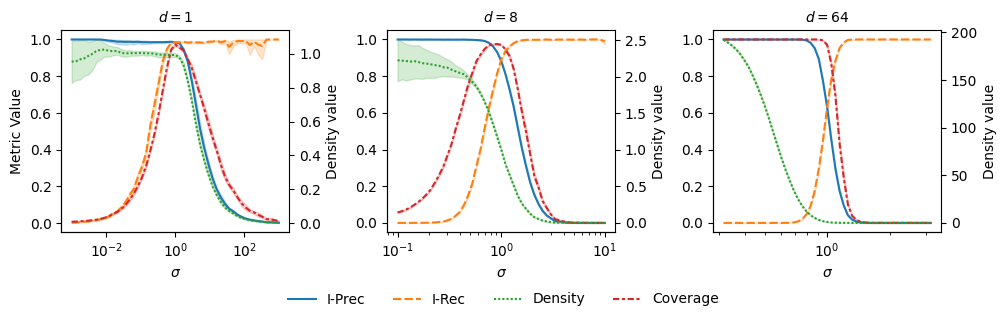

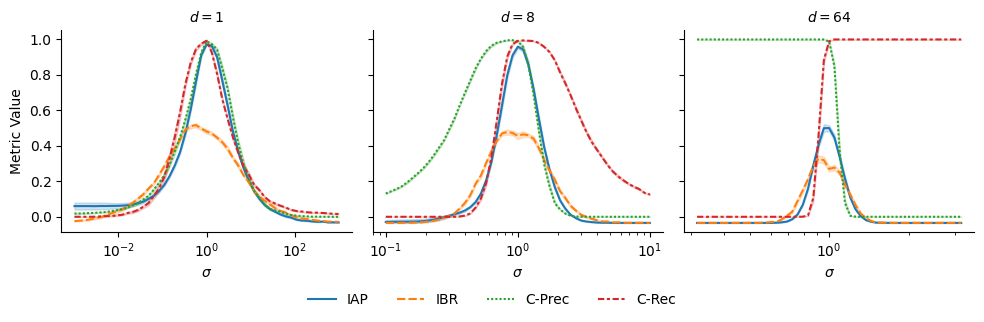

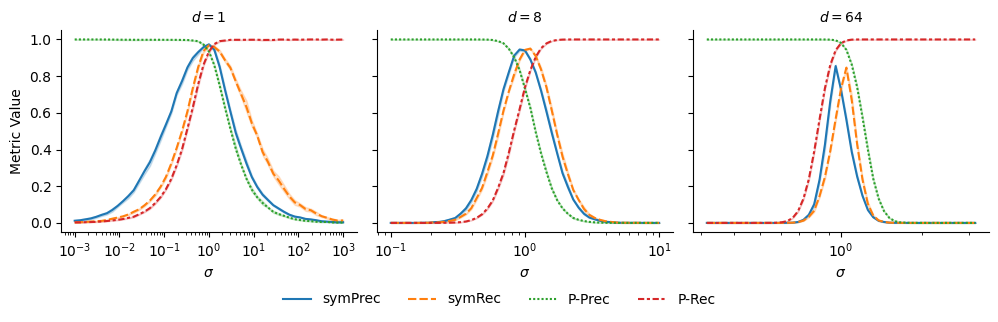

In [18]:
for i in range(3):
    subset_df = result_df[(result_df.metric_group == i) & (result_df.Metric != "Density")]
    g = sns.FacetGrid(subset_df, col="dim", sharex="col", sharey="row" if i != 0 else False)
    if i == 0:
        g.map_dataframe(
            sns.lineplot, x="syn_std", y="value", 
            hue="Metric", 
            hue_order=["I-Prec", "I-Rec", "Density", "Coverage"], 
            style="Metric",
            style_order=["I-Prec", "I-Rec", "Density", "Coverage"], 
        )
        for dim, ax in g.axes_dict.items():
            density_ax = ax.twinx()
            density_df = result_df[(result_df.Metric == "Density") & (result_df.dim == dim)]
            density_ax.set_ylabel("Density value")
            sns.lineplot(
                data=density_df, x="syn_std", y="value", ax=density_ax,
                hue="Metric", 
                hue_order=["I-Prec", "I-Rec", "Density", "Coverage"], 
                style="Metric",
                style_order=["I-Prec", "I-Rec", "Density", "Coverage"], 
                legend=False,
            )
    else:
        g.map_dataframe(sns.lineplot, x="syn_std", y="value", hue="Metric", style="Metric")

    g.set_titles("$d = {col_name}$")
    g.set_xlabels("$\sigma$")
    g.set_ylabels("Metric Value")
    g.set(xscale="log")
    g.add_legend()
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.05), ncol=4)
    plt.tight_layout()
    plt.savefig("../figures/gaussian/gaussian_std_difference_{}.pdf".format(i), bbox_inches="tight")
    plt.show()

# Gaussian Scaling One Dimension

In [69]:
result_df = pd.read_csv("../results/result-tables/gaussian-scaling-one-dimension.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,dim_2_scale
0,I-Prec,0,gaussian-scaling-one-dimension,0,0.003000,0.001000
1,I-Rec,0,gaussian-scaling-one-dimension,0,0.001000,0.001000
2,Density,0,gaussian-scaling-one-dimension,0,0.001800,0.001000
3,Coverage,0,gaussian-scaling-one-dimension,0,0.002000,0.001000
4,I-Prec,0,gaussian-scaling-one-dimension,0,0.016000,0.002069
...,...,...,...,...,...,...
2395,P-Rec,2,gaussian-scaling-one-dimension,9,0.000747,233.572147
2396,P-Prec,2,gaussian-scaling-one-dimension,9,0.000266,483.293024
2397,P-Rec,2,gaussian-scaling-one-dimension,9,0.000248,483.293024
2398,P-Prec,2,gaussian-scaling-one-dimension,9,0.000583,1000.000000


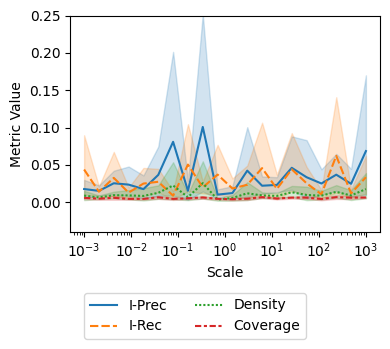

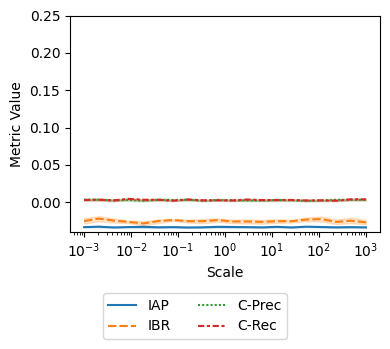

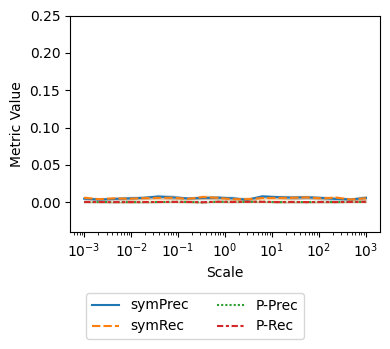

In [70]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    fig, ax = plt.subplots(1, figsize=(4.0, 3.0))
    sns.lineplot(data=subset_df, x="dim_2_scale", y="value", hue="Metric", style="Metric", ax=ax)
    plt.xlabel("Scale")
    plt.xscale("log")
    plt.ylabel("Metric Value")
    ax.set_ylim((-0.040, 0.25))
    fig.legend()
    ax.get_legend().remove()
    sns.move_legend(fig, "upper center", bbox_to_anchor=(0.5, 0.03), ncol=2)
    plt.tight_layout()
    plt.savefig("../figures/gaussian/gaussian_scaling_one_dimension_{}.pdf".format(i), bbox_inches="tight")
    plt.show()

# Gaussian Mean Difference with Pareto

In [71]:
result_df = pd.read_csv("../results/result-tables/gaussian-mean-difference-with-pareto.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,syn_mean
0,I-Prec,0,gaussian-mean-difference-with-pareto,0,0.035000,-6.00
1,I-Rec,0,gaussian-mean-difference-with-pareto,0,0.046000,-6.00
2,Density,0,gaussian-mean-difference-with-pareto,0,0.010400,-6.00
3,Coverage,0,gaussian-mean-difference-with-pareto,0,0.010000,-6.00
4,I-Prec,0,gaussian-mean-difference-with-pareto,0,0.048000,-5.76
...,...,...,...,...,...,...
6115,P-Rec,2,gaussian-mean-difference-with-pareto,9,0.009168,5.52
6116,P-Prec,2,gaussian-mean-difference-with-pareto,9,0.001952,5.76
6117,P-Rec,2,gaussian-mean-difference-with-pareto,9,0.003575,5.76
6118,P-Prec,2,gaussian-mean-difference-with-pareto,9,0.000018,6.00


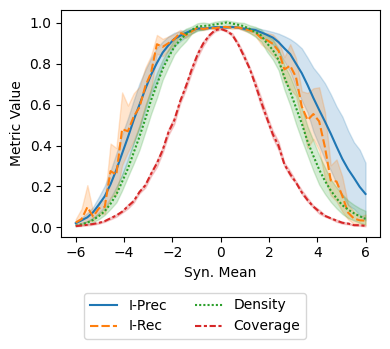

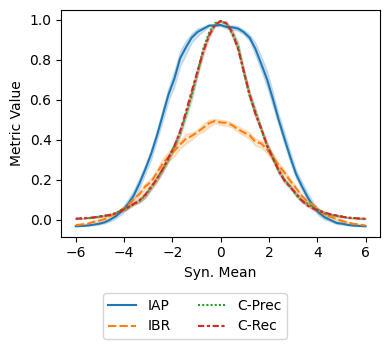

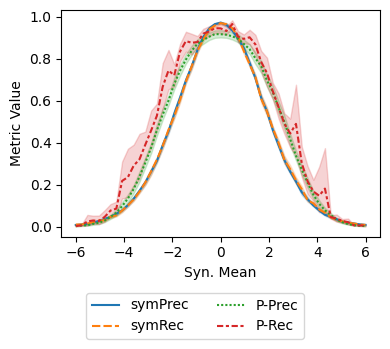

In [72]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    fig, ax = plt.subplots(1, figsize=(4.0, 3.0))
    sns.lineplot(data=subset_df, x="syn_mean", y="value", hue="Metric", style="Metric", ax=ax)
    plt.xlabel("Syn. Mean")
    plt.ylabel("Metric Value")
    fig.legend()
    ax.get_legend().remove()
    sns.move_legend(fig, "upper center", bbox_to_anchor=(0.5, 0.03), ncol=2)
    plt.tight_layout()
    plt.savefig("../figures/gaussian/gaussian_mean_difference_with_pareto{}.pdf".format(i), bbox_inches="tight")
    plt.show()

# Gaussian High Dimension with One Disjoint Dimension

In [73]:
result_df = pd.read_csv("../results/result-tables/gaussian-high-dim-one-disjoint-dim.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,extra_dim
0,I-Prec,0,gaussian-high-dim-one-disjoint-dim,0,0.0060,1
1,I-Rec,0,gaussian-high-dim-one-disjoint-dim,0,0.0270,1
2,Density,0,gaussian-high-dim-one-disjoint-dim,0,0.0022,1
3,Coverage,0,gaussian-high-dim-one-disjoint-dim,0,0.0040,1
4,I-Prec,0,gaussian-high-dim-one-disjoint-dim,0,0.0040,2
...,...,...,...,...,...,...
2155,P-Rec,2,gaussian-high-dim-one-disjoint-dim,9,1.0000,483
2156,P-Prec,2,gaussian-high-dim-one-disjoint-dim,9,1.0000,695
2157,P-Rec,2,gaussian-high-dim-one-disjoint-dim,9,1.0000,695
2158,P-Prec,2,gaussian-high-dim-one-disjoint-dim,9,1.0000,1000


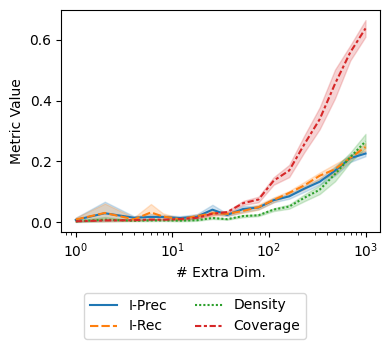

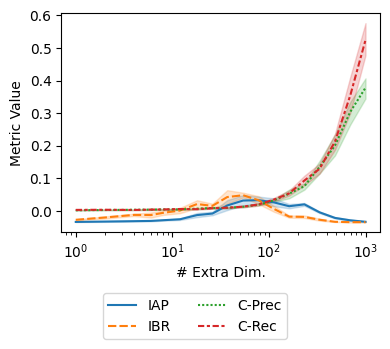

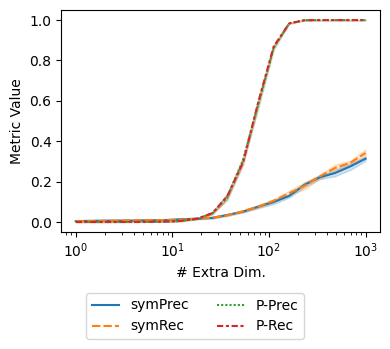

In [74]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    fig, ax = plt.subplots(1, figsize=(4.0, 3.0))
    sns.lineplot(data=subset_df, x="extra_dim", y="value", hue="Metric", style="Metric", ax=ax)
    plt.xlabel("# Extra Dim.")
    plt.xscale("log")
    plt.ylabel("Metric Value")
    fig.legend()
    ax.get_legend().remove()
    sns.move_legend(fig, "upper center", bbox_to_anchor=(0.5, 0.03), ncol=2)
    plt.tight_layout()
    plt.savefig("../figures/gaussian/gaussian_high_dim_one_disjoint_dim{}.pdf".format(i), bbox_inches="tight")
    plt.show()